In [1]:
%pip install -q matplotlib sympy numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import sympy

In [12]:
def L2_inner_product(f, g, tau, limit1, limit2):
    # you can define t here to not rely on a global definition
    t = sympy.symbols('t', real=True)
    return (sympy.integrate(f*sympy.conjugate(g), (t, limit1, limit2))/tau).simplify()

def L2_norm(f, tau, limit1, limit2):
    return sympy.sqrt(L2_inner_product(f, f, tau, limit1, limit2))

def L2_coefficient(f, g, tau, limit1, limit2):
    return (L2_inner_product(f, g, tau, limit1, limit2)/L2_norm(g, tau, limit1, limit2)**2).simplify()

# Function to Approximate

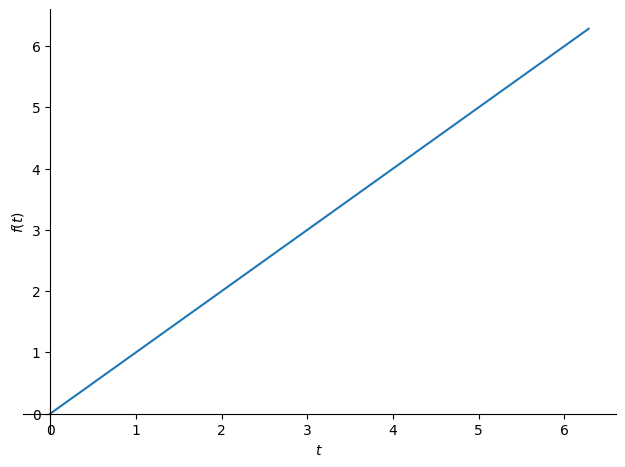

In [20]:
t = sympy.symbols('t', real=True)
f = t

sympy.plot(f, (t, 0, 2*sympy.pi))

# Fourier Series using $\{e^{-ikt}\}$, $k=[-\infty, \dots, \infty]$ as Basis

In [21]:
k = sympy.symbols('k', real=True, integer=True)
limit1 = -sympy.pi
limit2 = sympy.pi
tau = (2 * limit2)
w0 = 2*sympy.pi/tau
psi_k = sympy.exp(-sympy.I*k*w0*t)

ak = L2_coefficient(f, psi_k, tau, limit1, limit2)

ak

Piecewise(((-1)**(k + 3/2)/k, (k > 0) | (k < 0)), (0, True))

In [17]:
sympy.integrate(f*sympy.conjugate(f), (t, limit1, limit2))/(tau)

pi**4/5

In [18]:
# creating ak list
n = 3
ak_list = []
for k in range(-n, n+1):
    if k == 0:
        ak = np.pi/2
    elif k % 2 == 0: # even
        ak = 0
    else:
        ak = -2/(np.pi*k**2)
    ak_list.append(ak)

# compute error in approx p_n(t)
norm_f_sq = np.pi**2/3
error_norm_sq = norm_f_sq
for ak in ak_list:
    error_norm_sq = error_norm_sq - np.abs(ak)**2

error_norm = np.sqrt(error_norm_sq)
error_norm

np.float64(0.04348026911390171)

In [19]:
ak_list

[-0.0707355302630646,
 0,
 -0.6366197723675814,
 1.5707963267948966,
 -0.6366197723675814,
 0,
 -0.0707355302630646]